<a href="https://colab.research.google.com/github/gabitenoriob/Evolutionary-Computation/blob/main/ag_caxeiroViajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.3 MB/s eta 0:00:00


In [3]:
from deap import creator, base, tools, algorithms
import numpy as np
import random

# --- CONFIGURAÇÃO DO ALGORITMO GENÉTICO ---
# O objetivo é encontrar a rota com a menor distância entre 4 locais.

# 1. Inicialização da Toolbox
# A Toolbox é o contêiner principal para registrar as funções (operadores) do algoritmo genético.
toolbox = base.Toolbox()

# 2. Definição do Problema
# Define o número de "cidades" ou locais a serem visitados. O cromossomo terá esse tamanho.
n = 4

# 2.1. Definição da Aptidão (Fitness)
# Cria-se um tipo de fitness chamado 'FitnessMin'.
# O 'weights=(-1.0,)' indica que o objetivo é MINIMIZAR a função de aptidão.
# Um peso negativo significa minimização, um positivo significaria maximização.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# 2.2. Definição do Indivíduo
# Cria-se a estrutura do indivíduo. Cada indivíduo será uma lista Python ('list').
# Associamos o fitness 'FitnessMin' a cada indivíduo.
# Um indivíduo representará uma rota possível (ex: [cidade1, cidade3, cidade0, cidade2]).
creator.create("Individual", list, fitness=creator.FitnessMin)

# 3. Registro dos Operadores de Inicialização
# 3.1. Gene (Cromossomo)
# Registra uma função para gerar o cromossomo. 'np.random.permutation(n)' cria uma
# permutação aleatória dos números de 0 a (n-1), o que é ideal para problemas de rota.
toolbox.register("Genes", np.random.permutation, n)

# 3.2. Indivíduo
# Registra uma função para criar um indivíduo completo. 'tools.initIterate' popula
# um 'creator.Individual' com os genes gerados pela função 'toolbox.Genes'.
toolbox.register("Individuos", tools.initIterate, creator.Individual, toolbox.Genes)

# 3.3. População
# Registra uma função para criar a população, que será uma lista de indivíduos.
toolbox.register("Population", tools.initRepeat, list, toolbox.Individuos)

# 4. Matriz de Distâncias
# Matriz que define a distância entre cada par de locais.
# distancias[i][j] é a distância do local 'i' para o local 'j'.
distancias = np.array([[0, 1, 5, 2],
                       [1, 0, 3, 2],
                       [1, 3, 0, 3],
                       [2, 5, 3, 0]])

# 5. Função de Aptidão (Evaluation)
# Função que calcula a "qualidade" de um indivíduo (a distância total da rota).
def aptidao(individuo):
  distancia_total = 0
  # Itera pela rota e soma as distâncias entre locais consecutivos.
  for i in range(n - 1):
    local_origem = individuo[i]
    local_destino = individuo[i+1]
    distancia_total += distancias[local_origem][local_destino]

  # O DEAP espera que o fitness seja retornado como uma tupla. A vírgula no final cria a tupla.
  return distancia_total,

# 6. Registro dos Operadores Genéticos na Toolbox
toolbox.register("evaluate", aptidao) # Função de avaliação
toolbox.register("mate", tools.cxPartialyMatched) # Crossover para permutações
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1) # Mutação para permutações
toolbox.register("select", tools.selTournament, tournsize=2) # Seleção por torneio

# 7. Configuração de Estatísticas e Hall of Fame
# Cria um objeto para registrar estatísticas a cada geração.
estatistica = tools.Statistics(lambda ind: ind.fitness.values)
estatistica.register("max", np.max) # Fitness máximo
estatistica.register("min", np.min) # Fitness mínimo (o que nos interessa)
estatistica.register("med", np.mean) # Fitness médio

# Cria um objeto 'HallOfFame' para armazenar o melhor indivíduo encontrado em toda a execução.
hof = tools.HallOfFame(1)

# --- EXECUÇÃO DO ALGORITMO ---

# Gera a população inicial com 10 indivíduos.
pop = toolbox.Population(n=10)

# Executa o algoritmo evolutivo 'eaSimple'.
resultado, log = algorithms.eaSimple(
    pop,                      # População inicial
    toolbox,                  # Toolbox com os operadores
    cxpb=0.8,                 # Probabilidade de Crossover (80%)
    mutpb=0.1,                # Probabilidade de Mutação (10%)
    ngen=30,                  # Número de gerações
    stats=estatistica,        # Objeto de estatísticas
    halloffame=hof,           # Objeto Hall of Fame
    verbose=True              # Imprime o progresso no console
)

# --- RESULTADOS ---
print("\nMelhor Rota Encontrada:", hof[0])
print("Menor Distância:", hof[0].fitness.values[0])

gen	nevals	max	min	med
0  	10    	5  	1  	3.3
1  	10    	5  	1  	2.7
2  	5     	5  	1  	2.5
3  	10    	5  	1  	2.2
4  	9     	5  	1  	2.1
5  	9     	5  	1  	2.5
6  	8     	5  	1  	1.9
7  	10    	5  	1  	2.2
8  	10    	3  	1  	1.5
9  	9     	2  	1  	1.2
10 	10    	1  	1  	1  
11 	8     	1  	1  	1  
12 	6     	1  	1  	1  
13 	9     	1  	1  	1  
14 	8     	1  	1  	1  
15 	8     	1  	1  	1  
16 	8     	3  	1  	1.2
17 	10    	1  	1  	1  
18 	8     	5  	1  	1.4
19 	10    	1  	1  	1  
20 	8     	1  	1  	1  
21 	10    	1  	1  	1  
22 	8     	1  	1  	1  
23 	8     	1  	1  	1  
24 	10    	1  	1  	1  
25 	10    	5  	1  	1.4
26 	6     	1  	1  	1  
27 	8     	1  	1  	1  
28 	8     	5  	1  	1.4
29 	8     	1  	1  	1  
30 	8     	1  	1  	1  


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [4]:
print(resultado)

[[np.int64(0), np.int64(1), np.int64(3), np.int64(2)], [np.int64(0), np.int64(1), np.int64(2), np.int64(3)], [np.int64(0), np.int64(1), np.int64(2), np.int64(3)], [np.int64(0), np.int64(1), np.int64(2), np.int64(3)], [np.int64(0), np.int64(1), np.int64(2), np.int64(3)], [np.int64(0), np.int64(1), np.int64(2), np.int64(3)], [np.int64(0), np.int64(1), np.int64(2), np.int64(3)], [np.int64(0), np.int64(1), np.int64(3), np.int64(2)], [np.int64(0), np.int64(1), np.int64(3), np.int64(2)], [np.int64(0), np.int64(1), np.int64(3), np.int64(2)]]


In [5]:
print(hof)

[[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]]


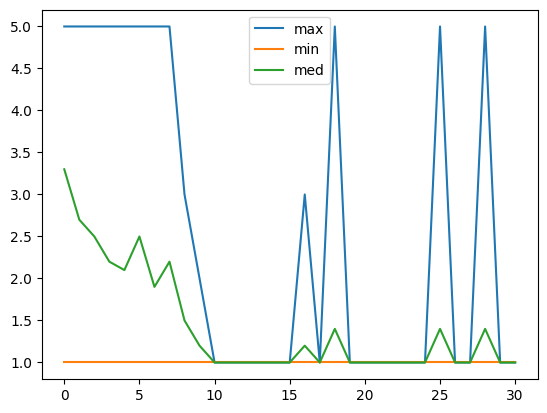

In [8]:
import matplotlib.pyplot as plt

plt.plot(log.select("max"))
plt.plot(log.select("min"))
plt.plot(log.select("med"))
plt.legend(["max","min","med"])
plt.show()

